In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covid = pd.read_csv('COVID-19 Cases(11-08-2021).csv' , index_col='S. No.')
#файл содержит информацию о количестве случаев подтверждения диагноза, текущих больных, выздоровлений и смертей от ковида
#по регионам.

covid.head(20)

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
S. No.,,,,,,
1,12/03/2020,India,74,71.0,3.0,0.0
2,13/03/2020,India,75,71.0,3.0,1.0
3,14/03/2020,India,84,72.0,10.0,2.0
4,15/03/2020,India,107,95.0,10.0,2.0
5,16/03/2020,India,114,99.0,13.0,2.0
6,17/03/2020,India,137,120.0,14.0,3.0
7,18/03/2020,India,146,129.0,14.0,3.0
8,19/03/2020,India,166,148.0,15.0,3.0
9,20/03/2020,India,195,171.0,20.0,4.0


In [63]:
dtypeCount =[covid.iloc[:,i].apply(type).value_counts() for i in range(covid.shape[1])]
dtypeCount


[<class 'str'>    18581
 Name: Date, dtype: int64,
 <class 'str'>    18581
 Name: Region, dtype: int64,
 <class 'int'>    18581
 Name: Confirmed Cases, dtype: int64,
 <class 'float'>    18581
 Name: Active Cases, dtype: int64,
 <class 'float'>    18581
 Name: Cured/Discharged, dtype: int64,
 <class 'float'>    18581
 Name: Death, dtype: int64]

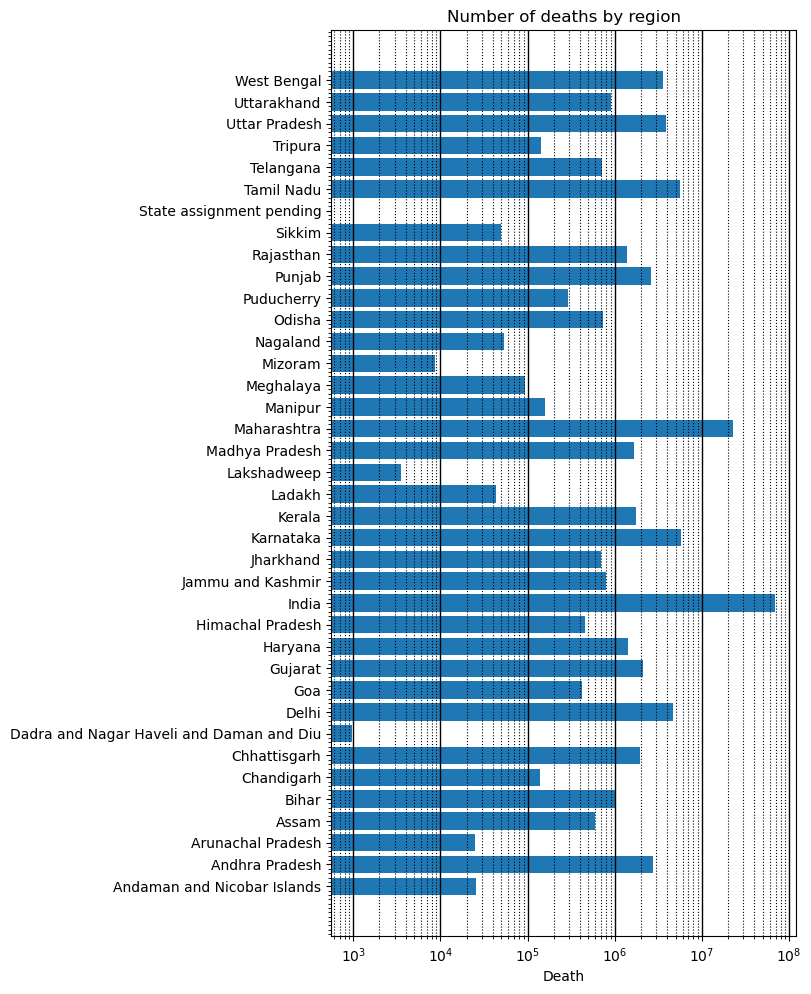

In [99]:
sick_count=covid.groupby(['Region']).sum().reset_index()
#sick_count

# уберем колонку World, она будет очень выбиваться
sick_count.drop(sick_count[sick_count['Region'] == 'World'].index, inplace=True)

plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (6,12)
plt.barh(sick_count['Region'], sick_count['Death'])
plt.xscale('log') #
plt.title('Number of deaths by region')
plt.xlabel("Death")
plt.minorticks_on()
plt.grid(which='major',axis = 'x',  color= 'k', linewidth=1)
plt.grid(which='minor',axis = 'x', color= 'k', linestyle=':')
plt.show()

#можно визуально сравнить количество смертей в различных регионах за весь период наблюдений который присутствует в файле

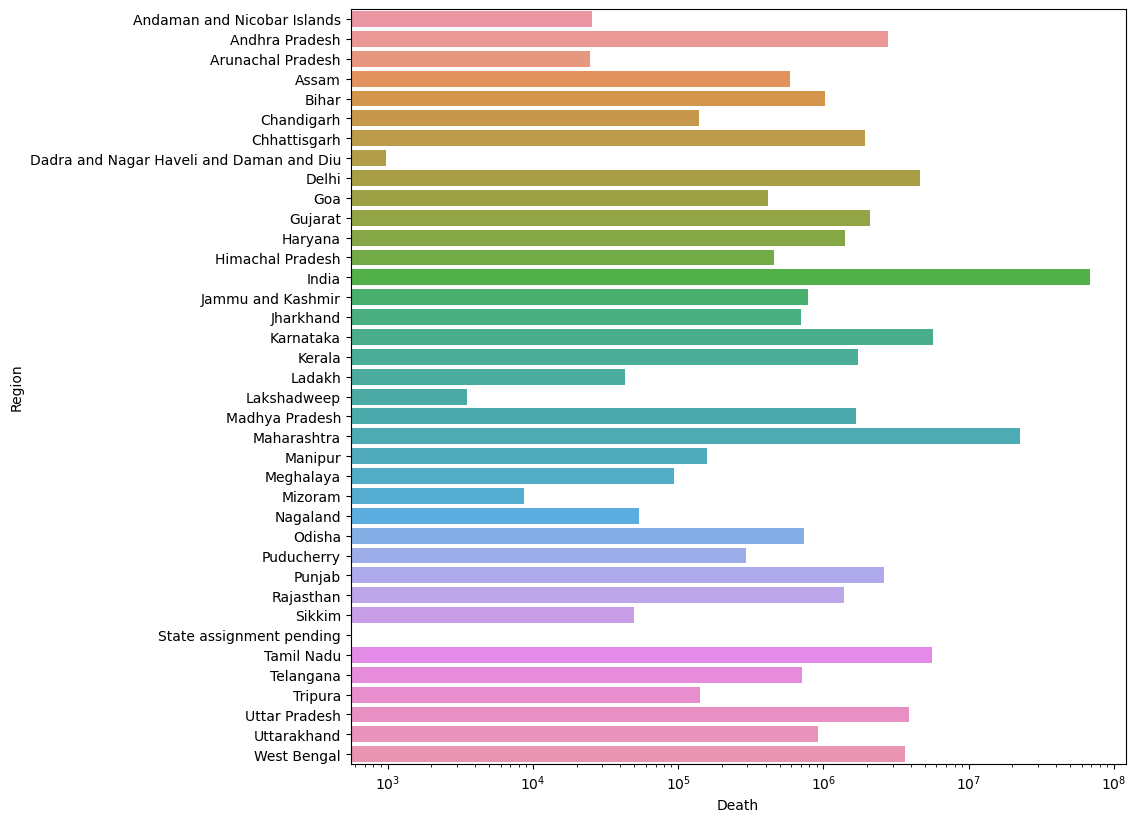

In [131]:
#построим аналогичный график, но с использованием библиотеки seaborn
plt.xscale('log')
sns.barplot(x='Death', y='Region', data=sick_count)
plt.show()

In [68]:
covid['Region'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'State assignment pending',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'World'], dtype=object)

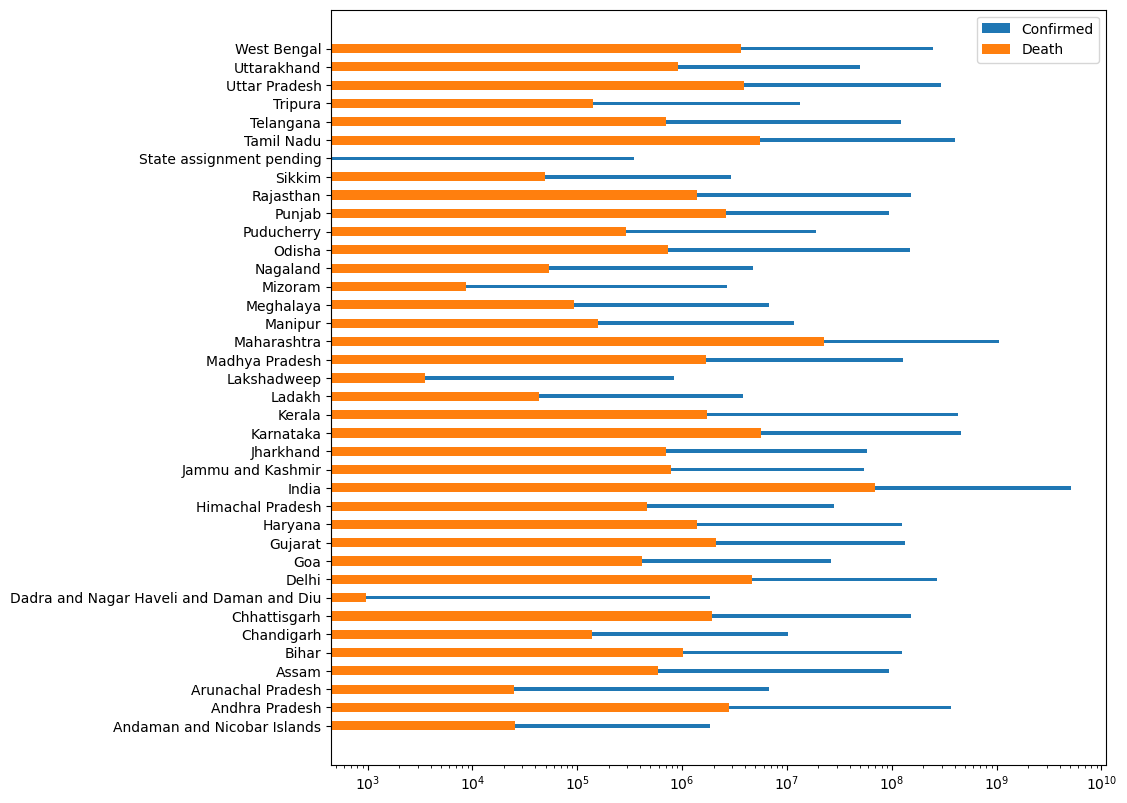

In [144]:
fig, ax = plt.subplots()
plt.xscale('log')

ax.barh(sick_count['Region'], sick_count['Confirmed Cases'],label='Confirmed', height=0.2)
ax.barh(sick_count['Region'], sick_count['Death'],label='Death', height=0.5)
plt.legend(loc = 1)
plt.show()
#подтвержденные случаи заболевания по отношению к количеству смертей

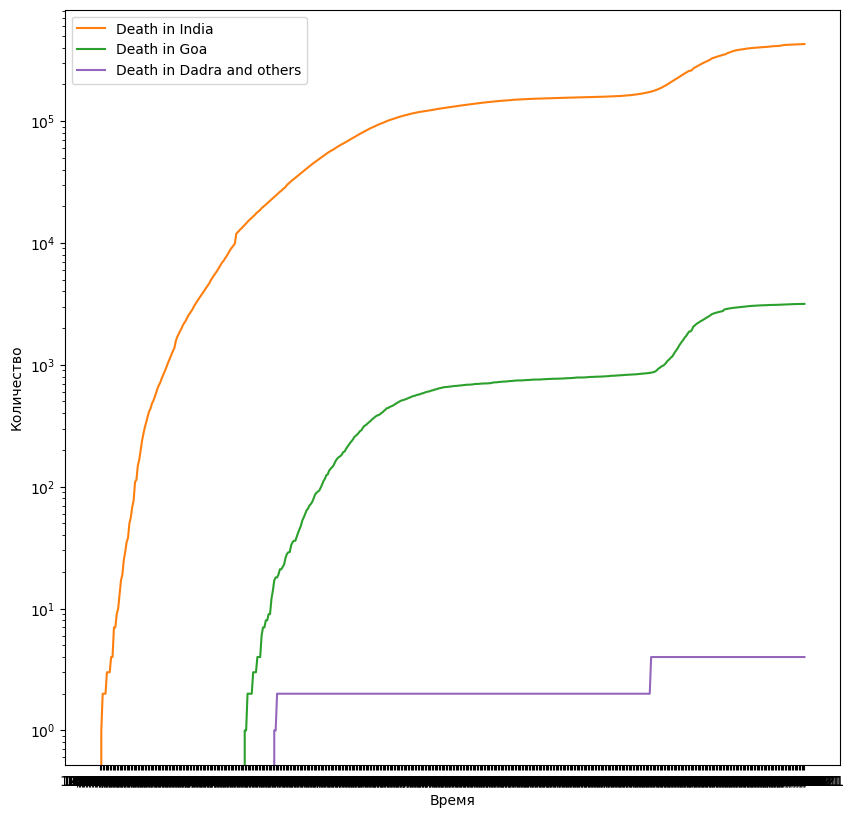

In [136]:
#выделим в отдельный датафрейм данные по региону India, как самому массовому по показателям
covid_india = covid[covid['Region'] == 'India']
#для сравнения возьмем еще регион Goa
covid_goa = covid[covid['Region'] == 'Goa']
#и регион по которому очень мало данных: Dadra and Nagar Haveli and Daman and Diu
covid_dadra = covid[covid['Region'] == 'Dadra and Nagar Haveli and Daman and Diu']


plt.rcParams["figure.figsize"] = (10,10)
plt.yscale('log')
plt.ylabel('Количество')
plt.xlabel('Время')
plt.plot(covid_india['Date'], covid_india['Death'],label = 'Death in India' , color='tab:orange')
plt.plot(covid_goa['Date'], covid_goa['Death'],label = 'Death in Goa' , color='tab:green')
plt.plot(covid_dadra['Date'], covid_dadra['Death'],label = 'Death in Dadra and others' , color='tab:purple')
plt.legend(loc = 2)
plt.show()

#смотрим за развитием смертности. Даже при малом количестве данных тенденция развития смертности похожа
#можно выдвинуть гипотезу: тенденция смертности населения не зависит от региона

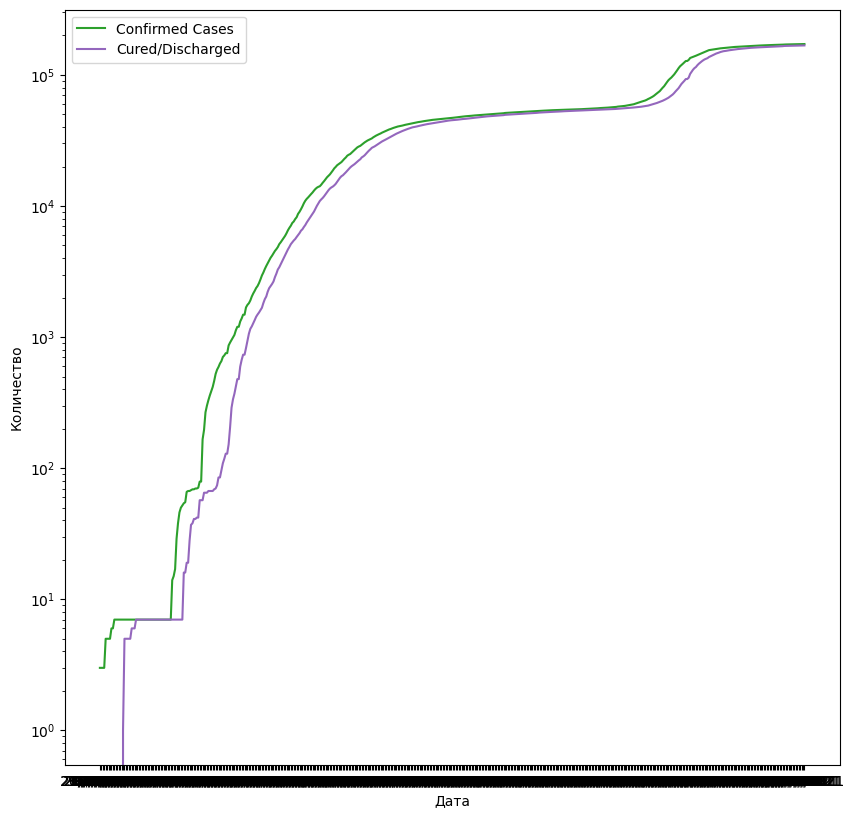

In [146]:
plt.rcParams["figure.figsize"] = (10,10)
plt.yscale('log')
plt.ylabel('Количество')
plt.xlabel('Дата')

#plt.plot(covid_goa['Date'], covid_goa['Death'],label = 'Death' , color='tab:orange')
plt.plot(covid_goa['Date'], covid_goa['Confirmed Cases'], label = 'Confirmed Cases' , color='tab:green')
plt.plot(covid_goa['Date'], covid_goa['Cured/Discharged'], label = 'Cured/Discharged', color='tab:purple')
plt.legend(  loc = 2)
plt.show()

In [76]:
covid_assam['MyDate'] = pd.to_datetime(covid_assam['Date'], format='%d/%m/%Y')

<ipython-input-76-b395278a3a8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_assam['MyDate'] = pd.to_datetime(covid_assam['Date'], format='%d/%m/%Y')


In [78]:
covid_assam.head(20)

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,MyDate
S. No.,,,,,,,
1972,02/04/2020,Assam,1,1.0,0.0,0.0,2020-04-02
1973,03/04/2020,Assam,16,16.0,0.0,0.0,2020-04-03
1974,04/04/2020,Assam,24,24.0,0.0,0.0,2020-04-04
1975,05/04/2020,Assam,24,24.0,0.0,0.0,2020-04-05
1976,06/04/2020,Assam,26,26.0,0.0,0.0,2020-04-06
1977,07/04/2020,Assam,26,26.0,0.0,0.0,2020-04-07
1978,08/04/2020,Assam,27,27.0,0.0,0.0,2020-04-08
1979,09/04/2020,Assam,28,28.0,0.0,0.0,2020-04-09
1980,10/04/2020,Assam,29,29.0,0.0,0.0,2020-04-10


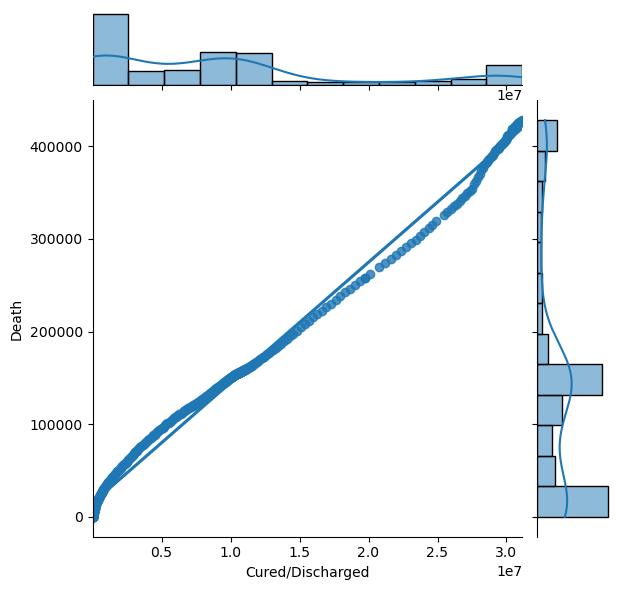

In [166]:
sns.jointplot(x='Cured/Discharged', y='Death', data=covid_india, kind='reg')

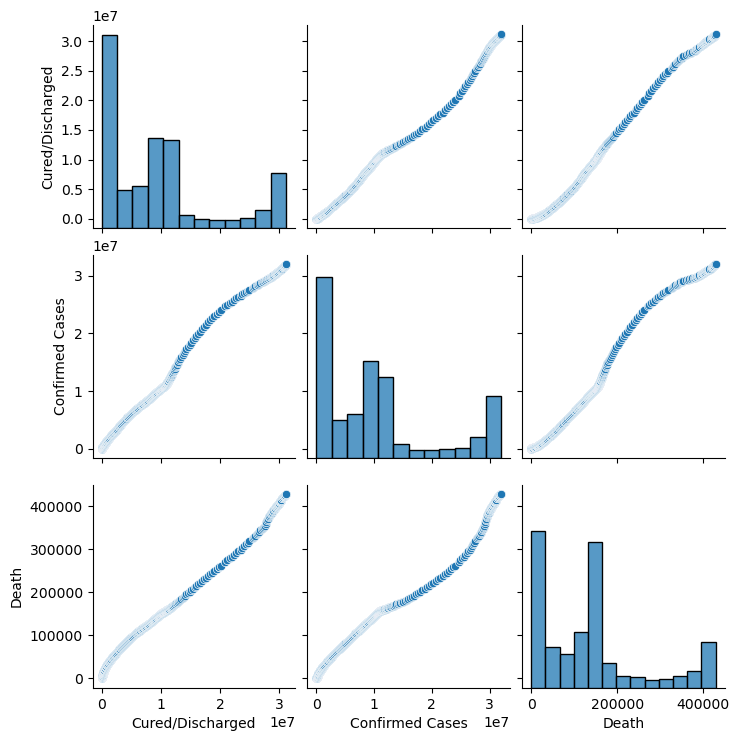

In [171]:
sns.pairplot(covid_india[['Cured/Discharged','Confirmed Cases', 'Death']])
plt.show()

#посмотрим на взаимосвязь вылеченных, подтвержденных диагнозов и смертей. 
#для отдельного региона
# судя по графикам можно предположить что при резком увеличении зараженных, санчала растет число смертей, потом число 
# вылеченных